# Using the SciKitLearn Iris Data Set

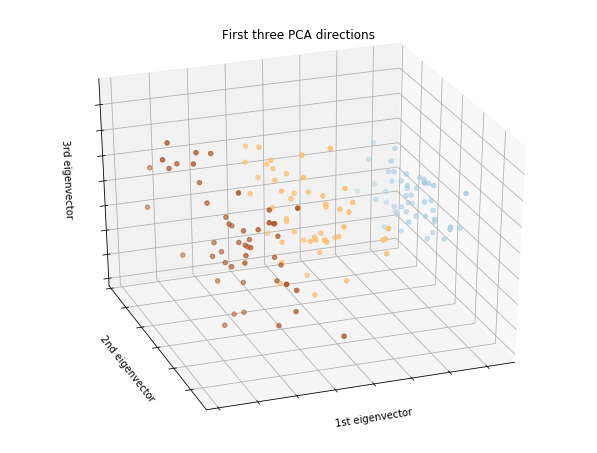

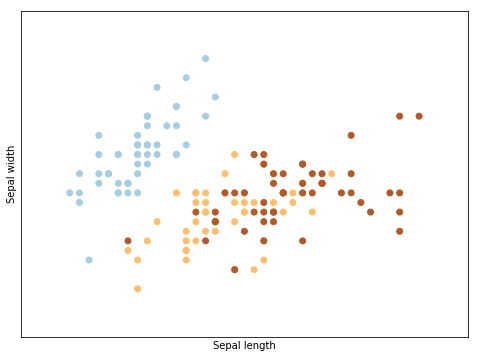

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514]


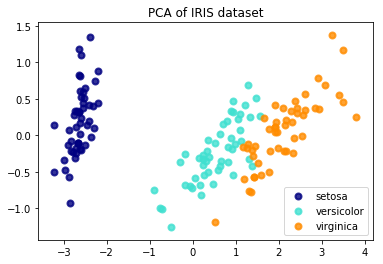

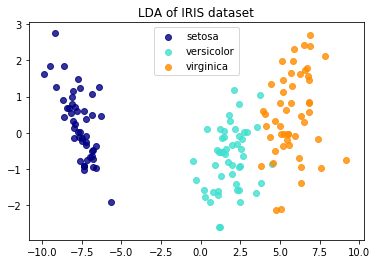

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [3]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
zip(colors, [0, 1, 2], target_names)

[('navy', 0, 'setosa'),
 ('turquoise', 1, 'versicolor'),
 ('darkorange', 2, 'virginica')]

# Can we do PCA on our dataset?

In [5]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
ctc = CellTypesCache()
cells = ctc.get_cells()
cell_index = {c['id']: c for c in cells}

ephys_features = ctc.get_ephys_features()
ephys_features_df = pd.DataFrame(ephys_features)

#remove text columns for PCA analysis

ephys_features = ephys_features_df.drop(['cre+', 'dendrite', 'depth','electrode_0_pa', 'has_burst', 'has_delay', 'has_pause', 'id',
                        'layer','PCA_1', 'PCA_2','rheobase_sweep_id', 'rheobase_sweep_number', 'specimen_id',
                        'thumbnail_sweep_id','transgenic_line','x','y','z'],1)

ephys_features = ephys_features.fillna(value=0)
X = ephys_features.as_matrix(columns = None)

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [34]:
pca = PCA(n_components=3)
X_r = pca.fit(scaled_data).transform(scaled_data)

print('explained variance ratio (first three components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first three components): [ 0.26421719  0.15471182  0.07773238]


In [35]:
ephys_features_df.head()

,PCA_1,PCA_2,adaptation,avg_isi,cre+,dendrite,depth,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,...,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,x,y,z
0,-1.543749,0.773655,0.046079,97.000000,cre reporter negative,spiny,0.572353,23.797500,0.124640,1.156475,...,-53.708337,-72.765629,3.119665,3.083533,3.068449,-85.968758,-72.388512,8089.34,1005.700,8197.74
1,-2.708678,-0.928319,0.093021,81.498750,cre reporter negative,spiny,0.392886,-6.184375,0.205899,1.126905,...,-56.812502,-69.306253,3.904747,4.131130,3.899439,-85.156258,-68.233376,8772.93,1393.570,2463.08
2,-2.736992,1.525479,0.051536,114.899286,cre reporter negative,spiny,0.501643,20.285626,0.125265,1.214955,...,-56.104168,-75.131253,3.577037,3.497449,3.393967,-90.500008,-74.548378,8678.25,842.377,3658.80
3,-2.744059,2.716493,0.022854,88.649000,cre reporter positive,spiny,0.392884,23.465624,0.127967,1.163960,...,-53.333336,-78.925003,4.067833,4.053186,4.076769,-91.062500,-78.132263,8509.08,1383.770,2291.70
4,4.320080,-0.865290,0.002046,17.251053,cre reporter positive,aspiny,0.537766,-29.671252,0.614248,1.041730,...,-60.072919,-78.867191,1.651282,1.511880,1.731274,-90.906258,-78.393799,8319.12,1649.760,9272.77


In [36]:
#add components back to dataset
ephys_features_df['pca_1'] = X_r[:,0]
ephys_features_df['pca_2'] = X_r[:,1]

# Plot by Dendrite Type

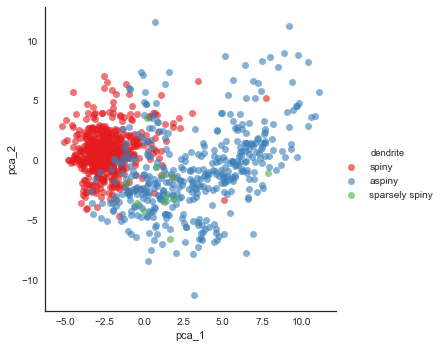

In [37]:
sns.set_style('white')
sns.lmplot(x='pca_1',y='pca_2', hue = 'dendrite',
           data = ephys_features_df,
           palette = sns.color_palette('Set1',3),
           fit_reg=False,scatter_kws={'alpha':0.6})

# Plot by Transgenic Line

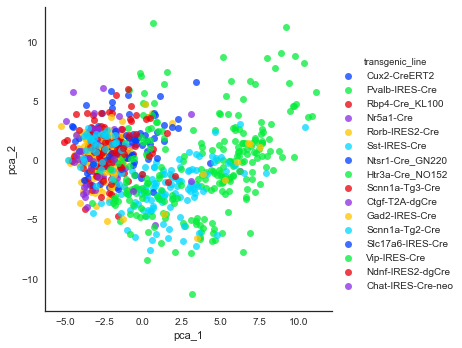

In [38]:
import seaborn as sns
sns.set(style='white')
sns.lmplot(x='pca_1',y='pca_2', hue = 'transgenic_line',
           data = ephys_features_df[(ephys_features_df['cre+'] == 'cre reporter positive')],
           palette = sns.color_palette("bright", 16),
           fit_reg=False,scatter_kws={'alpha':0.75})


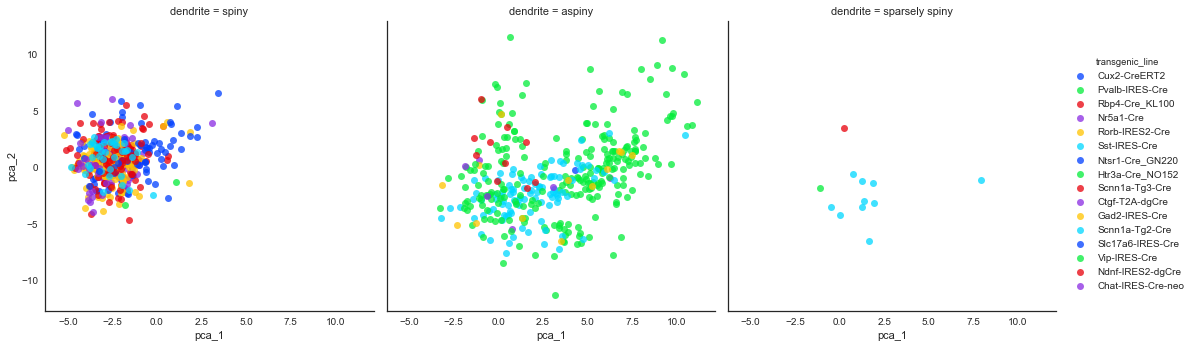

In [39]:
#compare components by creline and dendrite

sns.lmplot(x='pca_1',y='pca_2', hue = 'transgenic_line',
           data = ephys_features_df[(ephys_features_df['cre+'] == 'cre reporter positive')],
           palette = sns.color_palette("bright", 16), col = 'dendrite',
           fit_reg=False,scatter_kws={'alpha':0.75})

In [31]:
ephys_features_df.to_csv('ephys_features.csv')

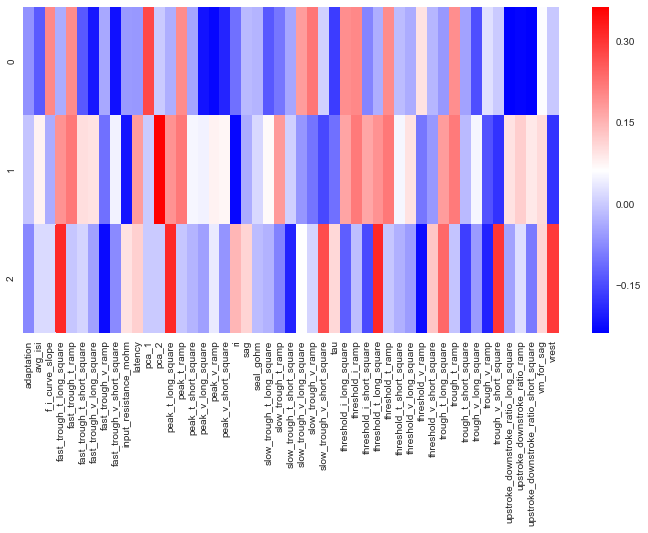

In [40]:
#what features are contributing to each component?

df_comp = pd.DataFrame(pca.components_,columns=ephys_features.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='bwr',)

In [18]:
df_comp.to_csv('ephys_features_comp.csv')

# Compare Scikitlearn PCA to Ephys Features PCA

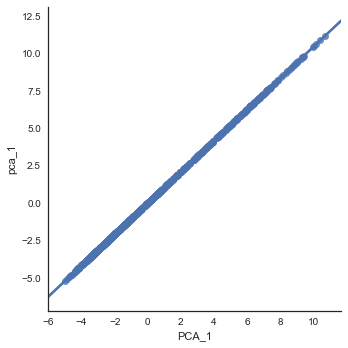

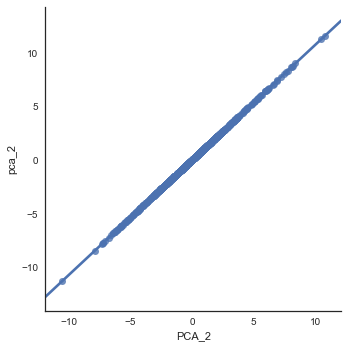

In [42]:
sns.lmplot(x = 'PCA_1', y = 'pca_1', data = ephys_features_df)
sns.lmplot(x = 'PCA_2', y = 'pca_2', data = ephys_features_df)


# Now let's look at one cell. Are the spikes distinguisable?

In [43]:
"""
http://celltypes.brain-map.org/mouse/experiment/electrophysiology/464212183
Sst - layer 5


476751360 pretty cool PCA
"""
data_set = ctc.get_ephys_data(476751360)

#get the sweep numbers
sweep_nums = data_set.get_sweep_numbers()

spikes = 0
for i in sweep_nums:
    spikes += len(data_set.get_spike_times(i))
print spikes

512


In [52]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

#sweep_ext has to be called before it can be used
columns = ['threshold_index',
 'threshold_t',
 'threshold_v',
 'threshold_i',
 'peak_index',
 'peak_t',
 'peak_v',
 'peak_i',
 'trough_index',
 'trough_t',
 'trough_v',
 'trough_i',
 'downstroke_index',
 'downstroke',
 'downstroke_t',
 'downstroke_v',
 'upstroke_index',
 'upstroke',
 'upstroke_t',
 'upstroke_v',
 'isi_type',
 'fast_trough_index',
 'fast_trough_t',
 'fast_trough_v',
 'fast_trough_i',
 'slow_trough_index',
 'slow_trough_t',
 'slow_trough_v',
 'slow_trough_i',
 'adp_index',
 'adp_t',
 'adp_v',
 'adp_i',
 'width',
 'upstroke_downstroke_ratio']

spikes_df = pd.DataFrame(columns = columns)
spikes_df['position'] = None
spikes_df['type'] = None
spikes_df['sweep'] = None

for sweep in sweep_nums:

    sweep_data = data_set.get_sweep(sweep)
    spike_times = data_set.get_spike_times(sweep)
    if len(spike_times) > 0:

        index_range = sweep_data["index_range"]
        i = sweep_data["stimulus"][0:index_range[1]+1] # in A
        v = sweep_data["response"][0:index_range[1]+1] # in V
        i *= 1e12 # to pA
        v *= 1e3 # to mV

        sampling_rate = sweep_data["sampling_rate"] # in Hz
        t = np.arange(0, len(v)) * (1.0 / sampling_rate)

        data_set.get_spike_times(sweep)

        end = spike_times[-1] + .02

        sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=end)
        sweep_ext.process_spikes()
        for j in range(len(spike_times)):
            temp_list = []
            for term in columns:
                temp_list.append(sweep_ext.spike_feature(term)[j])
            #add position
            temp_list.append(j+1)
            temp_list.append(data_set.get_sweep_metadata(sweep)['aibs_stimulus_name'])
            temp_list.append(sweep)
            spikes_df.loc[len(spikes_df)] = temp_list

In [65]:
#look at the dataframe quickly
spikes_df.tail()

,threshold_index,threshold_t,threshold_v,threshold_i,peak_index,peak_t,peak_v,peak_i,trough_index,trough_t,...,adp_i,width,upstroke_downstroke_ratio,position,type,sweep,PCA_1,PCA_2,LDA_1,LDA_2
507,2102498.0,10.512490,-33.031250,360.375,2102585.0,10.512925,-7.875000,361.250,2102825.0,10.514125,...,NaN,0.000460,1.828589,10.0,Noise 2,61.0,7.493657,4.324812,-3.388131,-9.294279
508,2103251.0,10.516255,-32.906254,342.000,2103334.0,10.516670,-8.312500,338.500,2103563.0,10.517815,...,NaN,0.000480,1.728141,11.0,Noise 2,61.0,7.673804,3.655583,-2.523600,-9.130677
509,2104253.0,10.521265,-31.750002,304.250,2104326.0,10.521630,-8.562501,300.625,3362245.0,16.811225,...,NaN,0.000495,1.672418,12.0,Noise 2,61.0,5.804114,5.547480,-2.138656,-11.408136
510,3604997.0,18.024985,-36.906254,323.125,3605073.0,18.025365,-11.312501,323.250,3605301.0,18.026505,...,NaN,0.000425,1.986840,13.0,Noise 2,61.0,7.354486,6.363743,-2.129012,-12.544085
511,3605916.0,18.029580,-33.750000,293.250,3605984.0,18.029920,-10.781251,284.250,3606260.0,18.031300,...,NaN,0.000470,1.816441,14.0,Noise 2,61.0,7.633636,4.765867,-0.922180,-11.989617


In [66]:
#convert that clunky dataframe to a useable array
#drop text and other columns

temp_df = spikes_df.drop(['type','sweep','isi_type','position',
                         'peak_i','trough_index','fast_trough_i',
                          'trough_i', 
                         'slow_trough_i','adp_index','adp_t',
                         'adp_v','adp_i','adp_index','downstroke_index',
                         'fast_trough_index','peak_index','slow_trough_index',
                         'threshold_index','upstroke_index', 'downstroke_t','fast_trough_t',
                         'peak_t', 'slow_trough_t', 'threshold_t', 'trough_t', 'upstroke_t'],1)

temp_df = temp_df.fillna(value=0)

#this will be used for PCA and LDA
X = temp_df.as_matrix(columns = None)

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [67]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled_data).transform(scaled_data)

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.57473501  0.18617346]


In [68]:
#add back to our old dataframe for easy to use vizzing

spikes_df['PCA_1'] = X_r[:,0]
spikes_df['PCA_2'] = X_r[:,1]

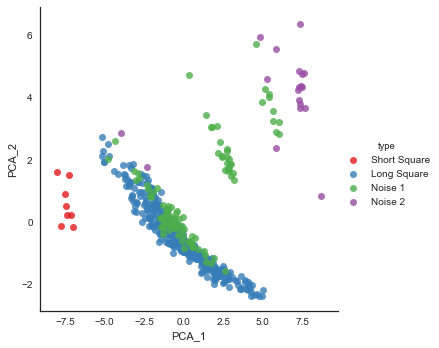

In [69]:
sns.lmplot(x='PCA_1',y='PCA_2', hue = 'type',
           data = spikes_df[(spikes_df['type'] != 'Square - 2s Suprathreshold')],
           palette = sns.color_palette('Set1',9),
           fit_reg=False,scatter_kws={'alpha':0.8})

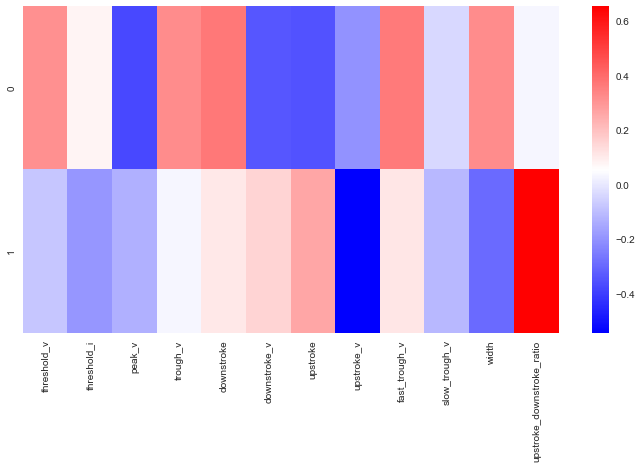

In [70]:
df_comp = pd.DataFrame(pca.components_,columns=temp_df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='bwr',)

In [71]:
lda = LinearDiscriminantAnalysis(n_components=2)
y = spikes_df['type']
X_r2 = lda.fit(X, y).transform(X)

In [72]:
spikes_df.head()

,threshold_index,threshold_t,threshold_v,threshold_i,peak_index,peak_t,peak_v,peak_i,trough_index,trough_t,...,adp_i,width,upstroke_downstroke_ratio,position,type,sweep,PCA_1,PCA_2,LDA_1,LDA_2
0,204589.0,1.022945,-44.187500,499.999969,204658.0,1.02329,9.031250,0.0,208575.0,1.042875,...,NaN,0.000355,1.264457,1.0,Short Square,11.0,-7.019247,-0.159740,185.590384,0.800140
1,204579.0,1.022895,-44.656250,489.999969,204648.0,1.02324,9.718751,0.0,208567.0,1.042835,...,NaN,0.000345,1.316203,1.0,Short Square,14.0,-7.483450,0.521134,181.018861,0.702748
2,204612.0,1.023060,-43.093754,0.000000,204676.0,1.02338,9.843751,0.0,208576.0,1.042880,...,NaN,0.000355,1.238844,1.0,Short Square,15.0,-8.048426,1.614920,178.168805,-0.342336
3,204590.0,1.022950,-44.562504,480.000031,204660.0,1.02330,9.875000,0.0,208575.0,1.042875,...,NaN,0.000350,1.241771,1.0,Short Square,17.0,-7.774181,-0.146369,176.062466,-0.292514
4,204594.0,1.022970,-44.531254,480.000031,204672.0,1.02336,8.843751,0.0,208606.0,1.043030,...,NaN,0.000345,1.264385,1.0,Short Square,18.0,-7.163905,0.229035,184.497824,0.731608


In [73]:
spikes_df['LDA_1'] = X_r2[:,0]
spikes_df['LDA_2'] = X_r2[:,1]

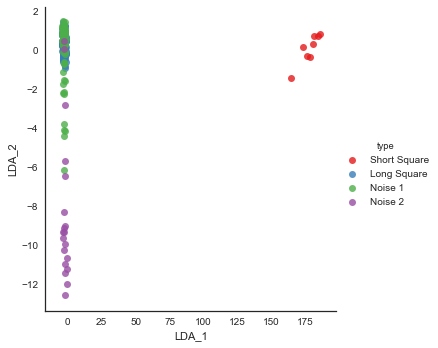

In [76]:
sns.lmplot(x='LDA_1',y='LDA_2', hue = 'type',
           data = spikes_df[(spikes_df['type'] != 'Square - 2s Suprathreshold')],
           palette = sns.color_palette('Set1',9),
           fit_reg=False,scatter_kws={'alpha':0.8})

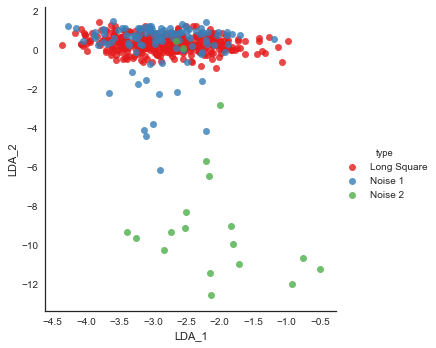

In [85]:
sns.lmplot(x='LDA_1',y='LDA_2', hue = 'type',
           data = spikes_df[(spikes_df['type'] != 'Short Square')],
           palette = sns.color_palette('Set1',9),
           fit_reg=False,scatter_kws={'alpha':0.8})